## Fitting Prompt and Non-Prompt photon $p_T$ distributions

### The Fits are used to flatten the $p_T$ distributions such that they are not trained in the neural net

**Dataset 'X' Holds Cluster Varlibales. Each cluster has 29 variables from ROOT NTuple.**
- 0-24 = Cell Fractional Energy (5x5 Cells). 0 if null.
- 25 = Inv.Sqrt(Cluster_E)
- 26 = Cluster Eta (Pseudo Rapidity)
- 27 = min_sm_dazimuth (Line 204 Conver_Sample.cc)
- 28 = v0 multiplicity (saved per cluster?)

**Dataset 'y' holds prompt/non-prompt integer. 1 = prompt; 0 = non-prompt**

In [1]:
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
f = h5py.File('embed_20g3d_pthat4_15o_246392.hdf5', 'r')
cluster_vars = f['X'] 
prompt_bools = f['y']

#combine into single dataset: Element 29 = prompt bool
cluster_dset = np.hstack([cluster_vars,prompt_bools])

**Create Prompt and Non-Prompt Datasets using "Masking"**

In [3]:
prompt = cluster_dset[cluster_dset[:,29] == 1] #Select Prompt Clusters
non_prompt = cluster_dset[cluster_dset[:,29] == 0] #Selects Non-Prompt Clusters

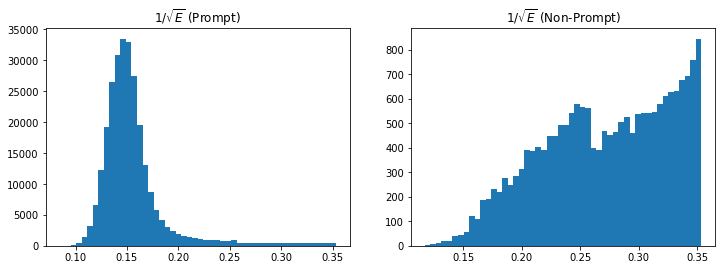

In [4]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
plt.title(r"$1/\sqrt{E}$ (Prompt)")
prompt_invE_hist = plt.hist(prompt[:,25],50)
ax = fig.add_subplot(1,2,2)
plt.title(r"$1/\sqrt{E}$ (Non-Prompt)")
nonprompt_invE_hist = plt.hist(non_prompt[:,25],50)

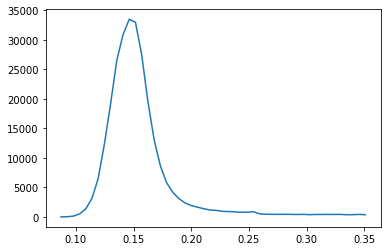

In [13]:
def prompt_spline(x,param):
    if (np.size(param) != 5):
        print("param must have size = 5")
    return (math.exp(param[0] + param[1] * math.log(x) +
        param[2] * math.log(x)**2 +
        param[3] * math.log(x)**3 +
        param[4] * math.log(x)**4))

param = [49106.129, -66807.181, 32507.609, -6690.8605, 494.94367]

binedges = prompt_invE_hist[1]
bincenters = np.mean(np.vstack([binedges[0:-1],binedges[1:]]), axis=0)
plt.plot(bincenters,prompt_invE_hist[0])

In [12]:
xdata=bincenters
ydata=prompt_invE_hist[0]

popt, pcov = curve_fit(prompt_spline, xdata, ydata, p0=param)
#plt.plot(xdata, curve_fit(xdata, *popt), 'r-', label='fit')

TypeError: prompt_spline() takes 2 positional arguments but 6 were given